#### build a regression model to predict property crimes.
multivariable regression

Propertycrime=α+Population+Population**2 + Murder+Robbery
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. 

Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=pd.read_excel('../../datasets/NEW_YORK-Offenses13.xlsx')
#


In [3]:
df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
#basic graphs for each variable
print(list(df))

['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3']


In [5]:
df.drop('Rape\n(revised\ndefinition)1',axis=1,inplace=True)

In [6]:
df.rename(index=str,columns={"Murder and\nnonnegligent\nmanslaughter":"Murder"},inplace=True)
df.rename(index=str,columns={"Rape\n(legacy\ndefinition)2":"Rape"},inplace=True)

In [7]:
print(list(df))

['City', 'Population', 'Violent\ncrime', 'Murder', 'Rape', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3']


In [9]:
df.isnull().sum()

City                       0
Population                 0
Violent\ncrime             0
Murder                     0
Rape                       0
Robbery                    0
Aggravated\nassault        0
Property\ncrime            0
Burglary                   0
Larceny-\ntheft            0
Motor\nvehicle\ntheft      0
Arson3                   161
dtype: int64

In [10]:
df["Arson3"].fillna(0, inplace = True)

In [11]:
df.isnull().sum()

City                     0
Population               0
Violent\ncrime           0
Murder                   0
Rape                     0
Robbery                  0
Aggravated\nassault      0
Property\ncrime          0
Burglary                 0
Larceny-\ntheft          0
Motor\nvehicle\ntheft    0
Arson3                   0
dtype: int64

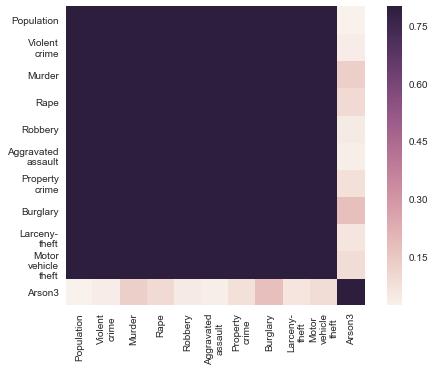

In [12]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

C:\Users\Vadim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Vadim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


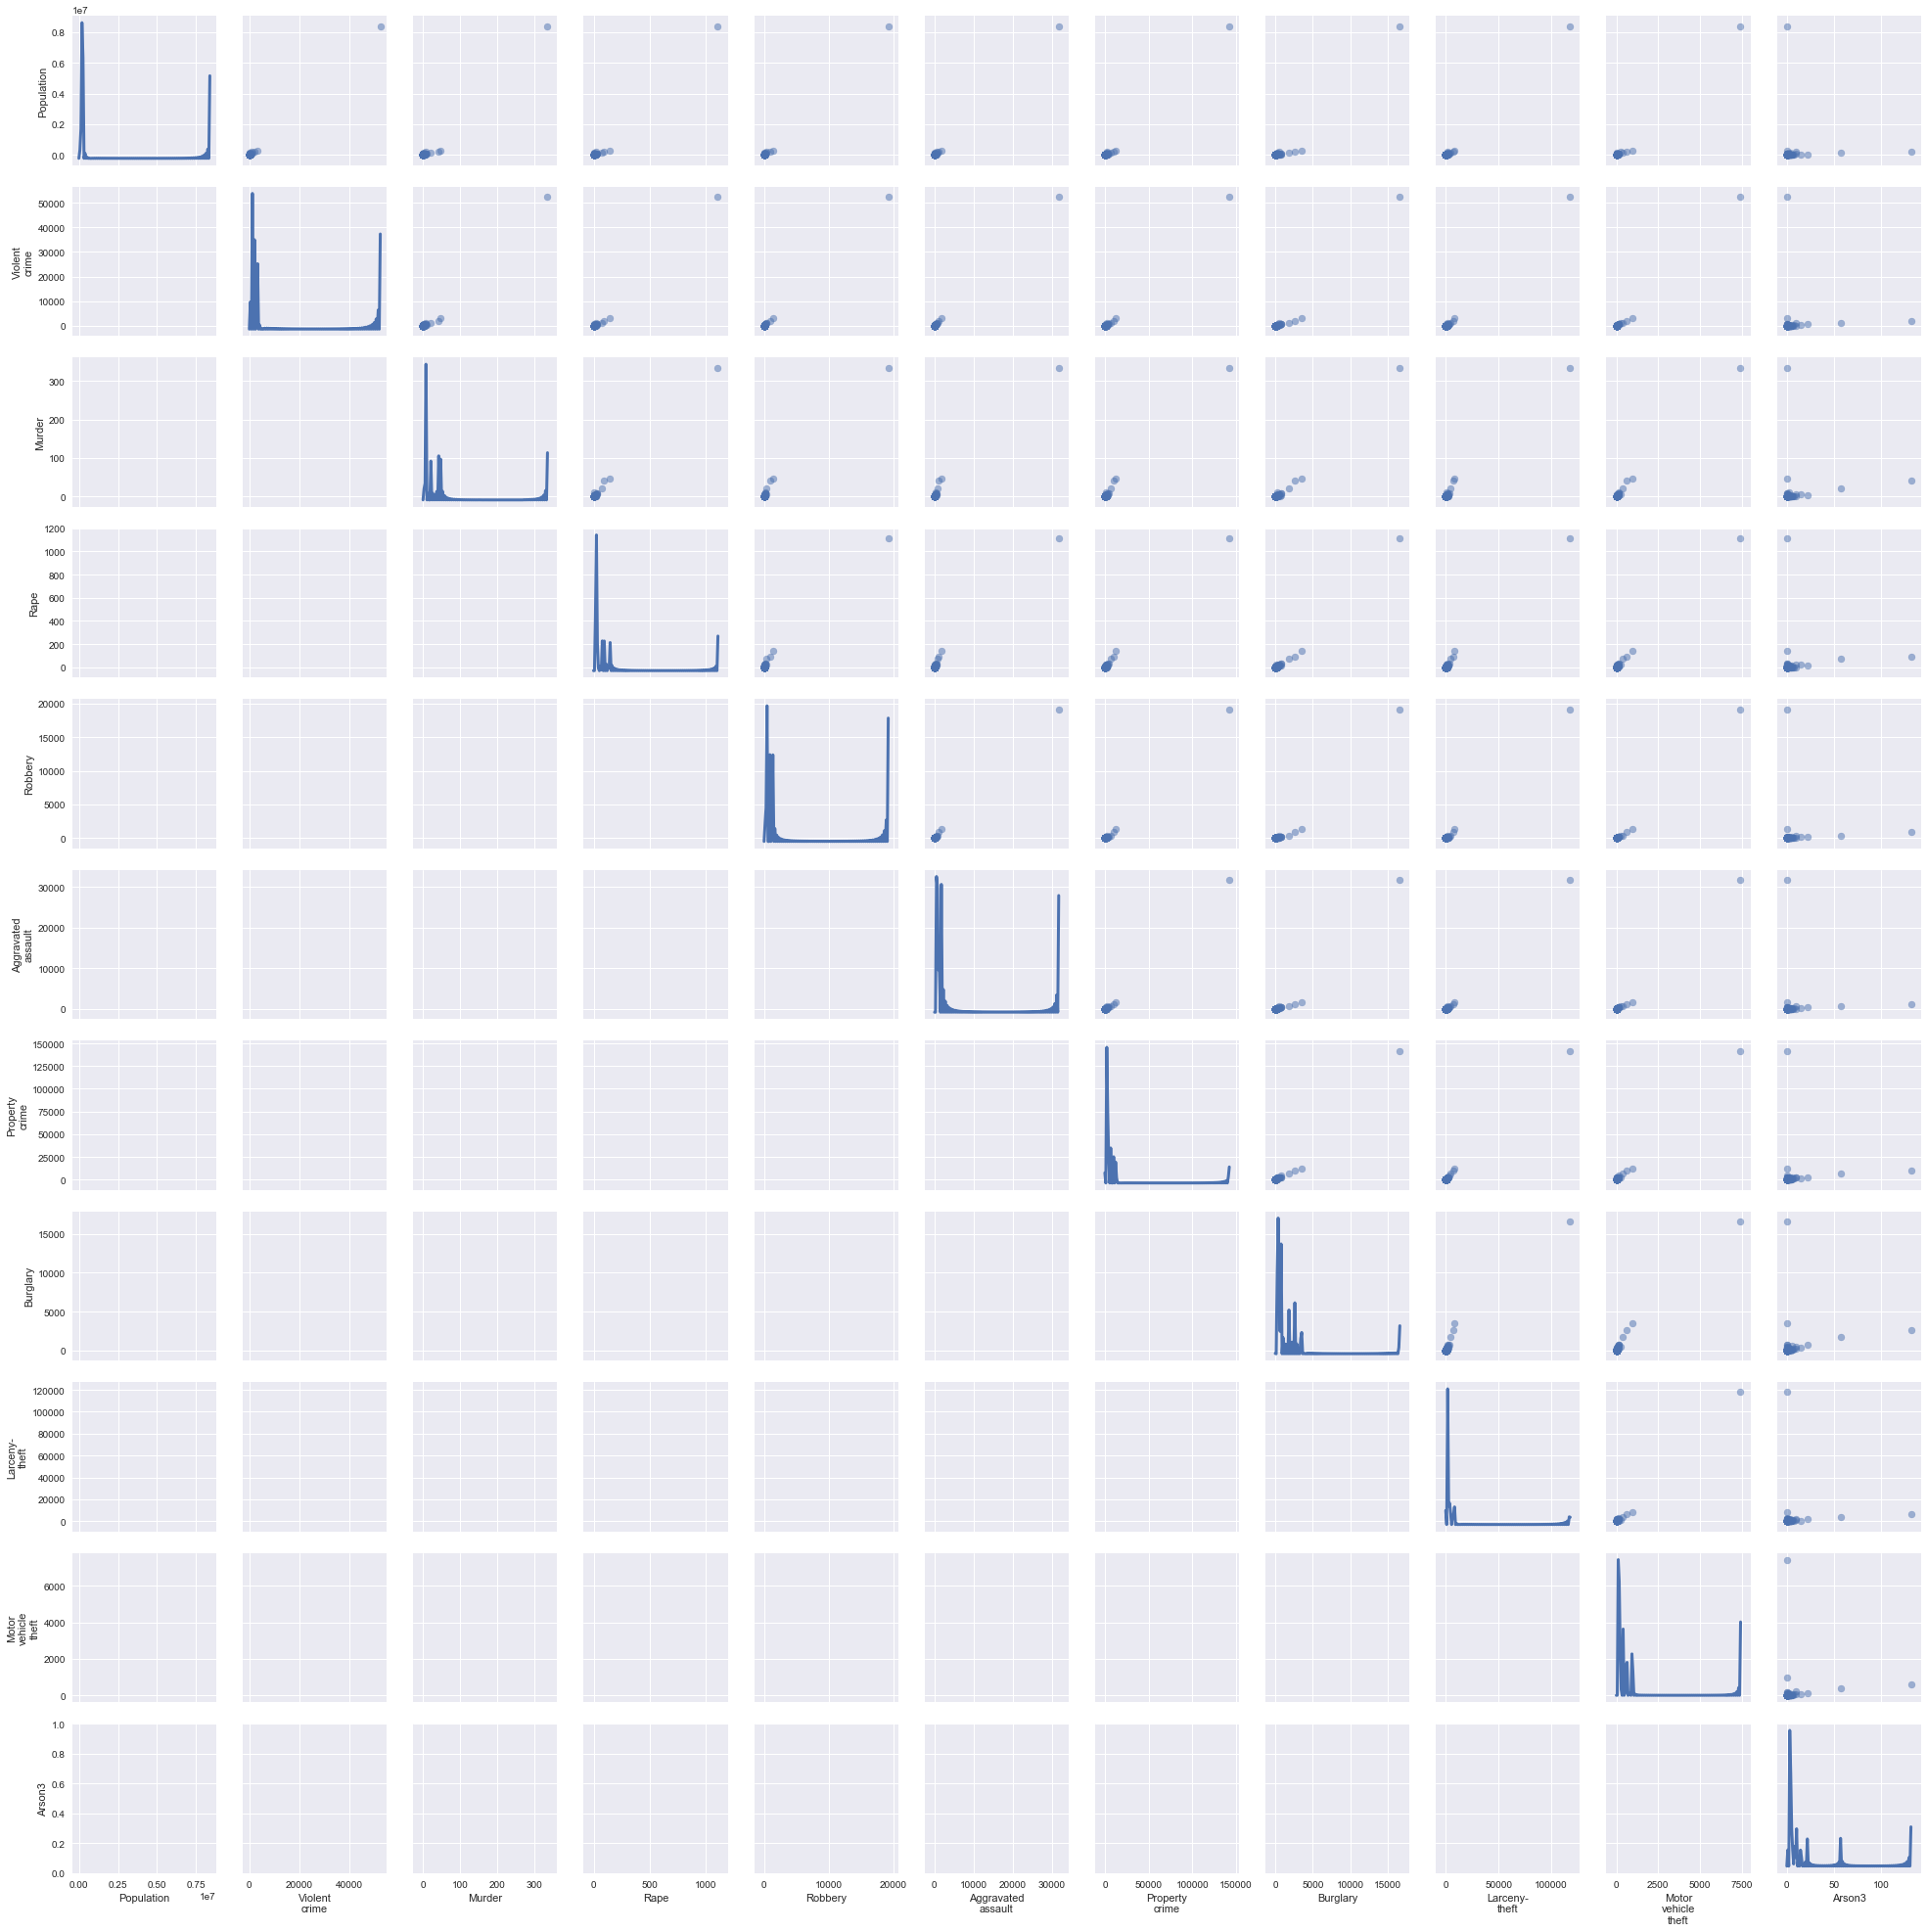

In [19]:
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

C:\Users\Vadim\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


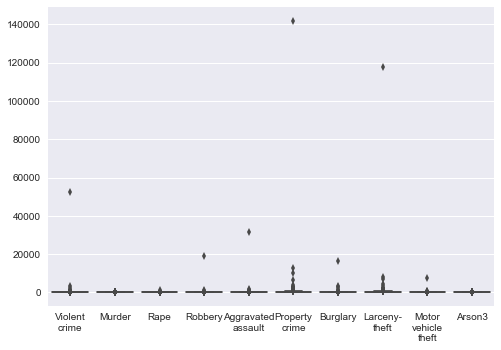

In [17]:
pr=df.drop(['City', 'Population'],axis=1)
sns.boxplot(pr)

In [ ]:

df['robCode']=df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
df['murderCode']=df['Murder'].apply(lambda x: 1 if x > 0 else 0)

df['PropertyCrime']=(df['Population'] + df['Population']**2)*100 + df['r']*10 + df['murderCode']

In [ ]:
df.tail(5)

In [ ]:
# onehot using OneHotEncoder example

In [ ]:


from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)


In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)



In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


In [ ]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[2, :])])
print(inverted)